In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
x = df_diamonds['carat'].values.reshape(-1,1)
y = df_diamonds['price'].values.reshape(-1,1)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #Creates model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
y_pred = regressor.predict(X_train)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coeficientes: \n', regressor.coef_)
print('Independent term: \n',regressor.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(Y_train, y_pred))

Coeficientes: 
 [[7741.37904828]]
Independent term: 
 [-2247.70447085]
Mean squared error: 2408781.08


In [9]:
print(regressor.score(X_test, Y_test))
print('Variance score: %.2f' % r2_score(Y_train, y_pred))

0.8509771156910653
Variance score: 0.85


Text(0.5, 0.98, 'Linear Regression Model')

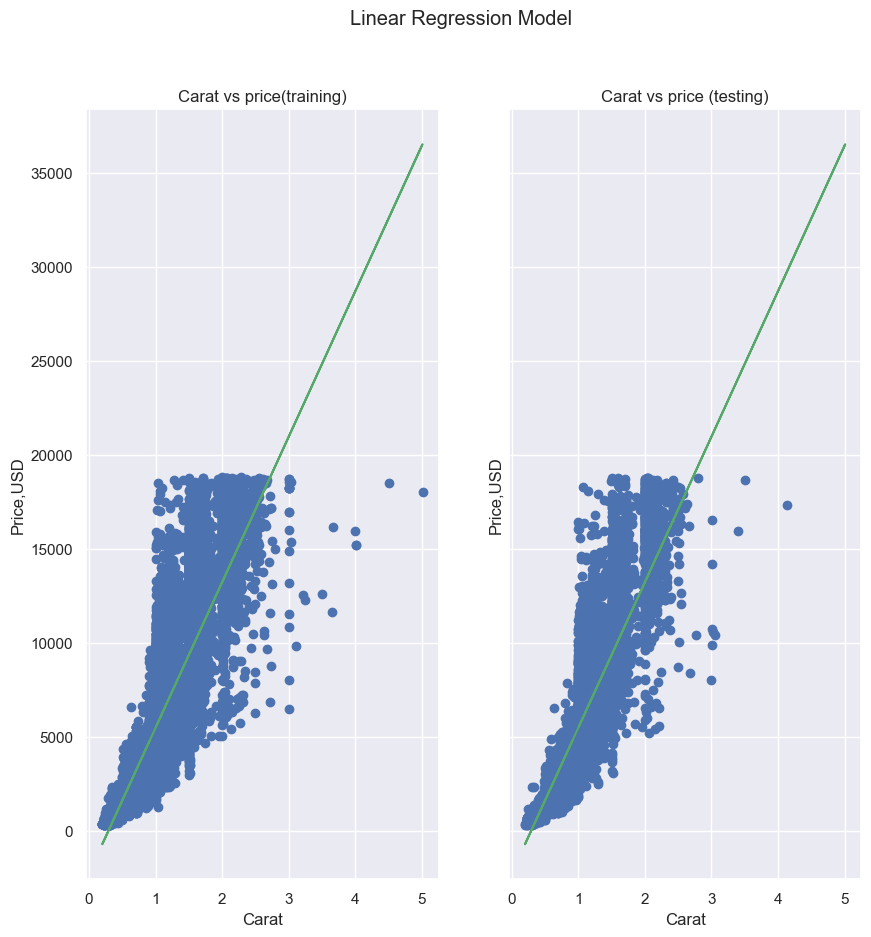

In [10]:
sns.set_theme()
fig, ax=plt.subplots(1,2,figsize=(10,10), sharey=True)
ax[0].scatter(X_train,Y_train)
ax[0].plot(X_train, regressor.predict(X_train), c='g')
ax[0].set_title('Carat vs price(training)')
ax[0].set_xlabel('Carat')
ax[0].set_ylabel('Price,USD')
ax[1].scatter(X_test,Y_test)
ax[1].plot(X_train, regressor.predict(X_train), c='g')
ax[1].set_title('Carat vs price (testing)')
ax[1].set_xlabel('Carat')
ax[1].set_ylabel('Price,USD')
plt.suptitle('Linear Regression Model')

In [11]:
xx=df_diamonds[['carat','z']].values
yy=df_diamonds['price'].values.reshape(-1,1)
XX_train, XX_test, YY_train, YY_test = train_test_split(xx,yy,test_size=0.3, random_state=0)
regressor.fit(XX_train, YY_train)
regressor.score(XX_test, YY_test)

0.855295875757326

**Conclusión.**
El modelo alcanzó un coeficiente de determinación del 85%, mostrando una relación fuerte entre las variables. 
Al agregar una variable más como es la profundidad del diamante, se mejora ligeramente el valor de R2, pasando de 0.85 a 0.855, indicando que el modelo se va ajustando mejor al agregar más variables.